# <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#060108; font-size:150%; text-align:center; border-radius:10px 10px;">Car Price Prediction EDA</p>
## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#060108; font-size:150%; text-align:center; border-radius:10px 10px;">Data Cleaning</p>


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import warnings 
# Avoiding the warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")


# Environment Settings:
plt.rcParams["figure.figsize"] = (10,6)
sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

# Set it None to display all rows in the dataframe
pd.set_option('display.max_rows', 1000)

# Load and Read the Data

In [2]:
# Import the json file (lines separated by /n) and display as a dataframe 

df_origin = pd.read_json("scout_car.json", lines=True)

df = df_origin.copy()

df.head(2).T

,0,1
url,https://www.autoscout24.com//offers/audi-a1-sp...,https://www.autoscout24.com//offers/audi-a1-1-...
make_model,Audi A1,Audi A1
short_description,Sportback 1.4 TDI S-tronic Xenon Navi Klima,1.8 TFSI sport
body_type,Sedans,Sedans
price,15770,14500
vat,VAT deductible,Price negotiable
km,"56,013 km","80,000 km"
registration,01/2016,03/2017
prev_owner,2 previous owners,None
kW,NaN,NaN


In [3]:
# Convert list type object to str type at all Columns since lists will not work with some functions

df = df.applymap(lambda x: ','.join(map(str, x)) if isinstance(x, list) else x)

In [4]:
# Strip some characters apart from the beginning and end

df = df.applymap(lambda x: x.strip('''\n' ".,-_/][''') if isinstance(x, str) else x)

df.head(2).T

,0,1
url,https://www.autoscout24.com//offers/audi-a1-sp...,https://www.autoscout24.com//offers/audi-a1-1-...
make_model,Audi A1,Audi A1
short_description,Sportback 1.4 TDI S-tronic Xenon Navi Klima,1.8 TFSI sport
body_type,Sedans,Sedans
price,15770,14500
vat,VAT deductible,Price negotiable
km,"56,013 km","80,000 km"
registration,01/2016,03/2017
prev_owner,2 previous owners,None
kW,NaN,NaN


# Dataset Information and Description

In [5]:
# Check the features and data types

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15919 entries, 0 to 15918
Data columns (total 54 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   url                            15919 non-null  object 
 1   make_model                     15919 non-null  object 
 2   short_description              15873 non-null  object 
 3   body_type                      15859 non-null  object 
 4   price                          15919 non-null  int64  
 5   vat                            11406 non-null  object 
 6   km                             15919 non-null  object 
 7   registration                   15919 non-null  object 
 8   prev_owner                     9091 non-null   object 
 9   kW                             0 non-null      float64
 10  hp                             15919 non-null  object 
 11  Type                           15917 non-null  object 
 12  Previous Owners                9279 non-null  

In [6]:
print("The number of rows in the dataset: ", df.shape[0])

print ("The number of features in the dataset: ", df.shape[1])

The number of rows in the dataset:  15919
The number of features in the dataset:  54


In [7]:
# Check for any duplicated rows

df.duplicated().value_counts()

False    15919
dtype: int64

In [8]:
# Describe numerical values

df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,15919.000,18019.897,7386.169,13.000,12850.000,16900.000,21900.000,74600.000
kW,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# Percentages of null values in each column

df.isnull().sum() / df.shape[0]*100

url                               0.000
make_model                        0.000
short_description                 0.289
body_type                         0.377
price                             0.000
vat                              28.350
km                                0.000
registration                      0.000
prev_owner                       42.892
kW                              100.000
hp                                0.000
Type                              0.013
Previous Owners                  41.711
Next Inspection                  77.794
Inspection new                   75.300
Warranty                         34.047
Full Service                     48.395
Non-smoking Vehicle              54.916
null                              0.000
Make                              0.000
Model                             0.000
Offer Number                     19.945
First Registration               10.032
Body Color                        3.750
Paint Type                       36.259


# Details of the Features

In [10]:
def column_overview(col):
    print('Column Name : ', col)
    print('--------------------------------')
    print('Per_of_Nulls   : ', '%', round(df[col].isnull().sum() / df.shape[0]*100, 2))
    print('Num_of_Nulls   : ', df[col].isnull().sum())
    print('Num_of_Uniques : ', df[col].nunique())
    print('Duplicates     : ', df.duplicated(subset = None, keep = 'first').sum(), end='\n\n')
    print('-----***-----')
    print('Value Counts : ')
    print(df[col].value_counts(dropna = False).sort_index())
    print('END*****************************', end='\n\n')

In [11]:
for col in df.columns:
    column_overview(col)

Column Name :  url
--------------------------------
Per_of_Nulls   :  % 0.0
Num_of_Nulls   :  0
Num_of_Uniques :  15919
Duplicates     :  0

-----***-----
Value Counts : 
https://www.autoscout24.com//offers/audi-a1-1-0-30-tfsi-sportback-advanced-2019-sh-pdc-gasoline-white-1037d13f-0851-44dd-b559-c6f6def8e6d2                     1
https://www.autoscout24.com//offers/audi-a1-1-0-30-tfsi-sportback-advanced-gasoline-white-16e81c6c-58ce-4b86-9926-9f09302d0ef4                                 1
https://www.autoscout24.com//offers/audi-a1-1-0-30-tfsi-sportback-advanced-gasoline-white-a48492d9-f2e5-436d-9ad4-dfb31ff19aed                                 1
https://www.autoscout24.com//offers/audi-a1-1-0-30-tfsi-sportback-basis-2019-navi-virtual-gasoline-white-6d94186e-c19d-4aa1-a223-bc0256d51845                  1
https://www.autoscout24.com//offers/audi-a1-1-0-30-tfsi-sportback-basis-2019-pdc-sh-gasoline-white-047a0fe6-743e-4ae6-892e-e97bc13b1468                        1
                        

# Investigating Features, Dropping, and Cleaning

### First, replace empty rows with np.nan

In [12]:
df.isin(['']).sum()

url                                  0
make_model                           0
short_description                    3
body_type                            0
price                                0
vat                                  0
km                                   0
registration                      1597
prev_owner                           0
kW                                   0
hp                                   0
Type                                 0
Previous Owners                      0
Next Inspection                      0
Inspection new                       0
Warranty                          1343
Full Service                      1985
Non-smoking Vehicle               3717
null                             15919
Make                                 0
Model                                0
Offer Number                         0
First Registration                   0
Body Color                           0
Paint Type                           0
Body Color Original      

In [13]:
df[df.isin([''])] = np.nan

In [14]:
#Check nan values for each column
df.isna().sum()

url                                  0
make_model                           0
short_description                   49
body_type                           60
price                                0
vat                               4513
km                                   0
registration                      1597
prev_owner                        6828
kW                               15919
hp                                   0
Type                                 2
Previous Owners                   6640
Next Inspection                  12384
Inspection new                   11987
Warranty                          6763
Full Service                      9689
Non-smoking Vehicle              12459
null                             15919
Make                                 0
Model                                0
Offer Number                      3175
First Registration                1597
Body Color                         597
Paint Type                        5772
Body Color Original      

### Second, drop the columns that have missing values more than 90%

In [15]:
# Detect and drop columns that have missing values exceeding a limit
def drop_nans_limit(df, limit):
    missing = df.isnull().sum()*100 / df.shape[0]
    drop_columns = missing.loc[lambda x: x >= limit]
    print('The columns to be dropped due to having 90% or more missing values: \n', drop_columns)
    df.drop(drop_columns.index, axis=1, inplace=True)

In [16]:
# Drop the columns that have missing values more than 90%
drop_nans_limit(df, 90)

The columns to be dropped due to having 90% or more missing values: 
 kW                              100.000
null                            100.000
Electricity consumption          99.139
Last Service Date                96.445
Other Fuel Types                100.000
Availability                     96.011
Last Timing Belt Service Date    99.899
Available from                   98.291
dtype: float64


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15919 entries, 0 to 15918
Data columns (total 46 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   url                      15919 non-null  object
 1   make_model               15919 non-null  object
 2   short_description        15870 non-null  object
 3   body_type                15859 non-null  object
 4   price                    15919 non-null  int64 
 5   vat                      11406 non-null  object
 6   km                       15919 non-null  object
 7   registration             14322 non-null  object
 8   prev_owner               9091 non-null   object
 9   hp                       15919 non-null  object
 10  Type                     15917 non-null  object
 11  Previous Owners          9279 non-null   object
 12  Next Inspection          3535 non-null   object
 13  Inspection new           3932 non-null   object
 14  Warranty                 9156 non-null

#### Drop some of the features due to incomplete entries or duplicate info

### Third, check each feature (or similar features together) and clean if needed.

#### Steps to be taken for each feature:

- **Check the value counts, null percentages, duplicates etc. of the feature.**
- **Clean and optimize the visual look of the data if needed.**
- **Drop the column if the feature is not helpful for the price prediction or not convenient to be filled.**


### Helpful functions

In [18]:
# Drops the column and updates the dataframe
def drop_col(df, col):
    df.drop(col, axis=1, inplace=True)

    
# Extracts numbers if the number is followed by a space and text, and assigns the float type
def extract_number(df, col):
    df[col] = df[col].astype('str').str.replace(',', '')
    df[col] = df[col].str.extract('(\d+)').astype('float')


## url

In [19]:
df["url"].value_counts(dropna=False)

https://www.autoscout24.com//offers/audi-a1-sportback-1-4-tdi-s-tronic-xenon-navi-klima-diesel-black-bdab349a-caa5-41b0-98eb-c1345b84445e                  1
https://www.autoscout24.com//offers/opel-insignia-bus-inno-2-0-cdti-aut-navi-bi-xe-led-e6-diesel-black-8710b253-dd98-4ed0-9d46-cbad2d79532b                1
https://www.autoscout24.com//offers/opel-insignia-sport-tourer-opel-sport-tourer-1-6-cdti-136-ch-a-c-diesel-silver-10b7463b-9f56-4348-af35-df3432b2b585    1
https://www.autoscout24.com//offers/opel-insignia-2-0cdti-st-business-innovation-navi-bt-diesel-black-ba5a3368-dedc-4e51-9127-3976b26e93c2                 1
https://www.autoscout24.com//offers/opel-insignia-sport-tourer-opel-sport-tourer-1-6-cdti-136-ch-a-c-diesel-silver-7b52f054-78d3-4d5e-9370-8a7d081d7edd    1
                                                                                                                                                          ..
https://www.autoscout24.com//offers/audi-a3-sb-30-1-6-tdi-

In [20]:
# Note: All the features in the links are included in the df, so not necessary

drop_col(df, "url")

## make_model, Make, and Model

In [21]:
df[["make_model", "Make", "Model"]]

,make_model,Make,Model
0,Audi A1,Audi,A1
1,Audi A1,Audi,A1
2,Audi A1,Audi,A1
3,Audi A1,Audi,A1
4,Audi A1,Audi,A1
...,...,...,...
15914,Renault Espace,Renault,Espace
15915,Renault Espace,Renault,Espace
15916,Renault Espace,Renault,Espace
15917,Renault Espace,Renault,Espace


In [22]:
df[["make_model", "Make", "Model"]].value_counts(dropna=False)

make_model      Make     Model   
Audi A3         Audi     A3          3097
Audi A1         Audi     A1          2614
Opel Insignia   Opel     Insignia    2598
Opel Astra      Opel     Astra       2526
Opel Corsa      Opel     Corsa       2219
Renault Clio    Renault  Clio        1839
Renault Espace  Renault  Espace       991
Renault Duster  Renault  Duster        34
Audi A2         Audi     A2             1
dtype: int64

In [23]:
column_overview("make_model")

Column Name :  make_model
--------------------------------
Per_of_Nulls   :  % 0.0
Num_of_Nulls   :  0
Num_of_Uniques :  9
Duplicates     :  877

-----***-----
Value Counts : 
Audi A1           2614
Audi A2              1
Audi A3           3097
Opel Astra        2526
Opel Corsa        2219
Opel Insignia     2598
Renault Clio      1839
Renault Duster      34
Renault Espace     991
Name: make_model, dtype: int64
END*****************************



In [24]:
# "make_model" will be kept instead of "make" and "model"

drop_col(df, "Make")
drop_col(df, "Model")

## short_description

In [25]:
column_overview("short_description")

Column Name :  short_description
--------------------------------
Per_of_Nulls   :  % 0.31
Num_of_Nulls   :  49
Num_of_Uniques :  9970
Duplicates     :  877

-----***-----
Value Counts : 
!! VENDUE VENDUE !!!                                  1
(2) 1.4 TDI ULTRA 90 AMBIENTE S tronic                1
(2) 1.6 CDTI 136 ELITE AUTO                           1
(3E GENERATION) III (2) 1.6 TDI 110 BUSINESS LINE     1
(4) Air Energy dCi 75                                 1
                                                     ..
van 1.5 dci 75cv S&S E6                              24
zoé life                                              1
Österr. Edition 16.CDTI                               1
None                                                 46
NaN                                                   3
Name: short_description, Length: 9972, dtype: int64
END*****************************



In [26]:
drop_col(df, "short_description")

## body_type and body

In [27]:
df[["body_type", "Body"]]

,body_type,Body
0,Sedans,Sedans
1,Sedans,Sedans
2,Sedans,Sedans
3,Sedans,Sedans
4,Sedans,Sedans
...,...,...
15914,Van,Van
15915,Van,Van
15916,Van,Van
15917,Van,Van


In [28]:
column_overview("body_type")
column_overview("Body")

Column Name :  body_type
--------------------------------
Per_of_Nulls   :  % 0.38
Num_of_Nulls   :  60
Num_of_Uniques :  9
Duplicates     :  878

-----***-----
Value Counts : 
Compact          3153
Convertible         8
Coupe              25
Off-Road           56
Other             290
Sedans           7903
Station wagon    3553
Transporter        88
Van               783
None               60
Name: body_type, dtype: int64
END*****************************

Column Name :  Body
--------------------------------
Per_of_Nulls   :  % 0.38
Num_of_Nulls   :  60
Num_of_Uniques :  9
Duplicates     :  878

-----***-----
Value Counts : 
Compact          3153
Convertible         8
Coupe              25
Off-Road           56
Other             290
Sedans           7903
Station wagon    3553
Transporter        88
Van               783
NaN                60
Name: Body, dtype: int64
END*****************************



In [29]:
drop_col(df, "Body")

## vat (value added tax)

In [30]:
column_overview("vat")

Column Name :  vat
--------------------------------
Per_of_Nulls   :  % 28.35
Num_of_Nulls   :  4513
Num_of_Uniques :  2
Duplicates     :  878

-----***-----
Value Counts : 
Price negotiable      426
VAT deductible      10980
None                 4513
Name: vat, dtype: int64
END*****************************



## km (kilometers)

In [31]:
column_overview("km")

Column Name :  km
--------------------------------
Per_of_Nulls   :  % 0.0
Num_of_Nulls   :  0
Num_of_Uniques :  6690
Duplicates     :  878

-----***-----
Value Counts : 
0 km          19
1 km         367
1,000 km      46
1,001 km       4
1,010 km       1
            ... 
990 km         2
991 km         1
995 km         1
999 km         3
km          1024
Name: km, Length: 6690, dtype: int64
END*****************************



In [32]:
df[["km"]]

,km
0,"56,013 km"
1,"80,000 km"
2,"83,450 km"
3,"73,000 km"
4,"16,200 km"
...,...
15914,km
15915,"9,900 km"
15916,15 km
15917,10 km


In [33]:
# Clean the entries by extracting the number value and stripping the text "km"

extract_number(df, "km")

In [34]:
df["km"].value_counts(dropna=False)

10.000       1045
NaN          1024
1.000         367
5.000         170
50.000        148
             ... 
67469.000       1
43197.000       1
10027.000       1
35882.000       1
57.000          1
Name: km, Length: 6690, dtype: int64

## registration and First Registration

In [35]:
column_overview("registration")

Column Name :  registration
--------------------------------
Per_of_Nulls   :  % 10.03
Num_of_Nulls   :  1597
Num_of_Uniques :  47
Duplicates     :  878

-----***-----
Value Counts : 
01/2016     376
01/2017     306
01/2018     511
01/2019     541
02/2016     472
02/2017     368
02/2018     539
02/2019     585
03/2016     536
03/2017     471
03/2018     695
03/2019     543
04/2016     532
04/2017     380
04/2018     541
04/2019     506
05/2016     459
05/2017     404
05/2018     572
05/2019     440
06/2016     452
06/2017     409
06/2018     532
06/2019     224
07/2016     176
07/2017     215
07/2018     396
07/2019       6
08/2016      94
08/2017     114
08/2018     285
08/2019       1
09/2016     141
09/2017     149
09/2018     141
09/2019       5
10/2016     160
10/2017     154
10/2018      97
11/2016     142
11/2017     180
11/2018     110
11/2019       1
12/2016     134
12/2017     123
12/2018     103
12/2019       1
NaN        1597
Name: registration, dtype: int64
END************

In [36]:
column_overview("First Registration")

Column Name :  First Registration
--------------------------------
Per_of_Nulls   :  % 10.03
Num_of_Nulls   :  1597
Num_of_Uniques :  4
Duplicates     :  878

-----***-----
Value Counts : 
2016    3674
2017    3273
2018    4522
2019    2853
NaN     1597
Name: First Registration, dtype: int64
END*****************************



In [37]:
df[["registration", "First Registration"]]

,registration,First Registration
0,01/2016,2016
1,03/2017,2017
2,02/2016,2016
3,08/2016,2016
4,05/2016,2016
...,...,...
15914,NaN,NaN
15915,01/2019,2019
15916,03/2019,2019
15917,06/2019,2019


In [38]:
# Create a new column that shows the age of the car

current_year = 2019

df["vehicle_age"] = current_year - df["First Registration"].astype("float")

In [39]:
column_overview("vehicle_age")

Column Name :  vehicle_age
--------------------------------
Per_of_Nulls   :  % 10.03
Num_of_Nulls   :  1597
Num_of_Uniques :  4
Duplicates     :  878

-----***-----
Value Counts : 
0.000    2853
1.000    4522
2.000    3273
3.000    3674
NaN      1597
Name: vehicle_age, dtype: int64
END*****************************



In [40]:
# Drop both "registration" columns

drop_col(df, "registration")
drop_col(df, "First Registration")

## prev_owner and Previous Owners

In [41]:
column_overview("prev_owner")

Column Name :  prev_owner
--------------------------------
Per_of_Nulls   :  % 42.89
Num_of_Nulls   :  6828
Num_of_Uniques :  4
Duplicates     :  878

-----***-----
Value Counts : 
1 previous owner     8294
2 previous owners     778
3 previous owners      17
4 previous owners       2
None                 6828
Name: prev_owner, dtype: int64
END*****************************



In [42]:
column_overview("Previous Owners")

Column Name :  Previous Owners
--------------------------------
Per_of_Nulls   :  % 41.71
Num_of_Nulls   :  6640
Num_of_Uniques :  101
Duplicates     :  878

-----***-----
Value Counts : 
0                                                                               163
0\n,\n,4.6 l/100 km (comb),\n,5.8 l/100 km (city),\n,3.9 l/100 km (country)       1
0\n,\n,5.4 l/100 km (comb),\n,7.1 l/100 km (city),\n,4.4 l/100 km (country)       2
0\n,\n,6.6 l/100 km (comb),\n,8.2 l/100 km (city),\n,5.7 l/100 km (country)       1
0\n,\n0 kWh/100 km (comb)                                                         2
0\n,\n104 g CO2/km (comb)                                                         1
0\n,\n105 g CO2/km (comb)                                                         1
0\n,\n106 g CO2/km (comb)                                                         1
0\n,\n107 g CO2/km (comb)                                                         1
0\n,\n114 g CO2/km (comb)                               

In [43]:
df[["prev_owner", "Previous Owners"]]

,prev_owner,Previous Owners
0,2 previous owners,2
1,None,NaN
2,1 previous owner,1
3,1 previous owner,1
4,1 previous owner,1
...,...,...
15914,None,NaN
15915,1 previous owner,"1\n,\n,7.4 l/100 km (comb),\n,9.2 l/100 km (ci..."
15916,1 previous owner,"1\n,\n139 g CO2/km (comb)"
15917,None,NaN


In [44]:
extract_number(df, "prev_owner")

In [45]:
df["prev_owner"].value_counts(dropna=False)

1.000    8294
NaN      6828
2.000     778
3.000      17
4.000       2
Name: prev_owner, dtype: int64

In [46]:
extract_number(df, "Previous Owners")

In [47]:
df["Previous Owners"].value_counts(dropna=False)

1.000    8294
NaN      6640
2.000     778
0.000     188
3.000      17
4.000       2
Name: Previous Owners, dtype: int64

In [48]:
# Keep "Previous Owners" as it has slightly less null values than "prev_owner" (to be dropped)

drop_col(df, "prev_owner")

## hp (horsepower)

In [49]:
column_overview("hp")

Column Name :  hp
--------------------------------
Per_of_Nulls   :  % 0.0
Num_of_Nulls   :  0
Num_of_Uniques :  81
Duplicates     :  878

-----***-----
Value Counts : 
1 kW        20
100 kW    1308
101 kW      47
103 kW     253
104 kW       8
110 kW    1112
112 kW       7
115 kW       1
117 kW       6
118 kW     516
119 kW      30
120 kW       8
121 kW     392
122 kW      35
123 kW       1
125 kW     707
127 kW       2
132 kW       1
133 kW       1
135 kW      24
137 kW       1
140 kW       2
141 kW      16
143 kW       2
146 kW      18
147 kW     380
149 kW       3
150 kW       2
154 kW      39
155 kW       6
162 kW      98
163 kW       1
164 kW      27
165 kW     194
167 kW       2
168 kW       3
184 kW       5
191 kW       7
195 kW       1
228 kW       2
239 kW       1
270 kW       2
294 kW      18
4 kW         1
40 kW        2
44 kW        1
51 kW      695
52 kW       22
53 kW        2
54 kW      276
55 kW      569
56 kW      286
57 kW       10
60 kW      160
63 kW        2
65 kW 

In [50]:
extract_number(df, "hp")

In [51]:
df["hp_kW"] = df["hp"]

In [52]:
column_overview("hp_kW")

Column Name :  hp_kW
--------------------------------
Per_of_Nulls   :  % 0.55
Num_of_Nulls   :  88
Num_of_Uniques :  80
Duplicates     :  878

-----***-----
Value Counts : 
1.000        20
4.000         1
9.000         1
40.000        2
44.000        1
51.000      695
52.000       22
53.000        2
54.000      276
55.000      569
56.000      286
57.000       10
60.000      160
63.000        2
65.000        4
66.000     2122
67.000       40
70.000      888
71.000       59
74.000       81
75.000        1
76.000        4
77.000      345
78.000       20
80.000        3
81.000     1402
82.000       22
84.000        1
85.000     2542
86.000        2
87.000      232
88.000      177
89.000        2
90.000        4
92.000      466
93.000        3
96.000       72
98.000        3
100.000    1308
101.000      47
103.000     253
104.000       8
110.000    1112
112.000       7
115.000       1
117.000       6
118.000     516
119.000      30
120.000       8
121.000     392
122.000      35
123.000   

In [53]:
drop_col(df, "hp")

## Type

In [54]:
column_overview("Type")

Column Name :  Type
--------------------------------
Per_of_Nulls   :  % 0.01
Num_of_Nulls   :  2
Num_of_Uniques :  169
Duplicates     :  878

-----***-----
Value Counts : 
Demonstration,,Diesel                                                                                                                     45
Demonstration,,Diesel (Particulate Filter)                                                                                               129
Demonstration,,Gasoline                                                                                                                  158
Demonstration,,Gasoline (Particulate Filter)                                                                                               1
Demonstration,,Regular/Benzine 91                                                                                                         36
Demonstration,,Regular/Benzine 91 (Particulate Filter)                                                                    

In [55]:
# Extract the type of the car

df["Type"] = df["Type"].str.extract('(.*?),')

In [56]:
df["Type"].value_counts(dropna=False)

Used              11096
New                1650
Pre-registered     1364
Employee's car     1011
Demonstration       796
NaN                   2
Name: Type, dtype: int64

## Next Inspection and Inspection new

In [57]:
df[["Next Inspection", "Inspection new"]]

,Next Inspection,Inspection new
0,"06/2021\n,\n99 g CO2/km (comb)","Yes\n,\nEuro 6"
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,"Yes\n,\n109 g CO2/km (comb)"
...,...,...
15914,NaN,NaN
15915,"01/2022\n,\n168 g CO2/km (comb)",NaN
15916,NaN,"Yes\n,\nEuro 6d-TEMP"
15917,NaN,NaN


In [58]:
column_overview("Next Inspection")

Column Name :  Next Inspection
--------------------------------
Per_of_Nulls   :  % 77.79
Num_of_Nulls   :  12384
Num_of_Uniques :  1384
Duplicates     :  878

-----***-----
Value Counts : 
01/1921\n,\n120 g CO2/km (comb)        1
01/1955                                1
01/1999                                1
01/2001\n,\n120 g CO2/km (comb)        1
01/2001\n,\n122 g CO2/km (comb)        2
                                   ...  
12/2021\n,\n153 g CO2/km (comb)        4
12/2021\n,\n167 g CO2/km (comb)        1
12/2021\n,\nEuro 6                     1
12/2022                                1
NaN                                12384
Name: Next Inspection, Length: 1385, dtype: int64
END*****************************



In [59]:
column_overview("Inspection new")

Column Name :  Inspection new
--------------------------------
Per_of_Nulls   :  % 75.3
Num_of_Nulls   :  11987
Num_of_Uniques :  201
Duplicates     :  878

-----***-----
Value Counts : 
Yes                                                                                442
Yes\n,\n,4.1 l/100 km (comb),\n,7.5 l/100 km (city),\n,5.2 l/100 km (country)        1
Yes\n,\n,4.2 l/100 km (comb),\n,5 l/100 km (city),\n,3.7 l/100 km (country)         11
Yes\n,\n,4.3 l/100 km (comb),\n,5.1 l/100 km (city),\n,3.8 l/100 km (country)        4
Yes\n,\n,4.3 l/100 km (comb),\n,5.2 l/100 km (city),\n,3.9 l/100 km (country)        1
Yes\n,\n,4.4 l/100 km (comb),\n,5.2 l/100 km (city),\n,3.9 l/100 km (country)        4
Yes\n,\n,4.4 l/100 km (comb),\n,5.4 l/100 km (city),\n,3.8 l/100 km (country)        8
Yes\n,\n,4.4 l/100 km (comb),\n,5.4 l/100 km (city),\n,3.9 l/100 km (country)        1
Yes\n,\n,4.4 l/100 km (comb),\n,5.4 l/100 km (city),\n,5 l/100 km (country)          1
Yes\n,\n,4.4 l/100 km (comb),\

In [60]:
drop_col(df, "Next Inspection")
drop_col(df, "Inspection new")

## Warranty

In [61]:
column_overview("Warranty")

Column Name :  Warranty
--------------------------------
Per_of_Nulls   :  % 42.48
Num_of_Nulls   :  6763
Num_of_Uniques :  505
Duplicates     :  883

-----***-----
Value Counts : 
1 (No sticker)                                                                           17
1 months                                                                                  1
1 months\n,\nEuro 6                                                                       2
10 months\n,\n104 g CO2/km (comb)                                                         1
100 g CO2/km (comb)                                                                       4
101 g CO2/km (comb)                                                                       6
102 g CO2/km (comb)                                                                      33
103 g CO2/km (comb)                                                                      34
104 g CO2/km (comb)                                                                

In [62]:
df["Warranty"].str.contains("year").sum()

0

In [63]:
df["Warranty"].str.contains("month").sum()

4853

In [64]:
df["Warranty"].str.extract(r"(\d+) *month").astype("float").value_counts()

12.000    2594
24.000    1118
60.000     401
36.000     279
48.000     149
6.000      125
72.000      59
3.000       33
23.000      11
18.000      10
20.000       7
25.000       6
2.000        5
26.000       4
50.000       4
16.000       4
34.000       3
1.000        3
19.000       3
4.000        3
13.000       3
28.000       2
46.000       2
45.000       2
21.000       2
9.000        2
11.000       2
14.000       2
17.000       2
22.000       2
30.000       1
33.000       1
10.000       1
40.000       1
15.000       1
47.000       1
8.000        1
49.000       1
7.000        1
56.000       1
65.000       1
dtype: int64

In [65]:
df["warranty_month"] = df["Warranty"].str.extract(r"(\d+) *month").astype("float")

In [66]:
column_overview("warranty_month")

Column Name :  warranty_month
--------------------------------
Per_of_Nulls   :  % 69.51
Num_of_Nulls   :  11066
Num_of_Uniques :  41
Duplicates     :  883

-----***-----
Value Counts : 
1.000         3
2.000         5
3.000        33
4.000         3
6.000       125
7.000         1
8.000         1
9.000         2
10.000        1
11.000        2
12.000     2594
13.000        3
14.000        2
15.000        1
16.000        4
17.000        2
18.000       10
19.000        3
20.000        7
21.000        2
22.000        2
23.000       11
24.000     1118
25.000        6
26.000        4
28.000        2
30.000        1
33.000        1
34.000        3
36.000      279
40.000        1
45.000        2
46.000        2
47.000        1
48.000      149
49.000        1
50.000        4
56.000        1
60.000      401
65.000        1
72.000       59
NaN       11066
Name: warranty_month, dtype: int64
END*****************************



In [67]:
drop_col(df, "Warranty")

## Full Service

In [68]:
column_overview("Full Service")

Column Name :  Full Service
--------------------------------
Per_of_Nulls   :  % 60.86
Num_of_Nulls   :  9689
Num_of_Uniques :  120
Duplicates     :  883

-----***-----
Value Counts : 
0 kWh/100 km (comb)                                                        2
1 (No sticker)                                                            29
101 g CO2/km (comb)                                                       10
102 g CO2/km (comb)                                                       29
103 g CO2/km (comb)                                                       29
104 g CO2/km (comb)                                                       77
105 g CO2/km (comb)                                                       11
106 g CO2/km (comb)                                                       38
107 g CO2/km (comb)                                                       32
108 g CO2/km (comb)                                                       19
109 g CO2/km (comb)                          

In [69]:
drop_col(df, "Full Service")

## Non-smoking Vehicle

In [70]:
column_overview("Non-smoking Vehicle")

Column Name :  Non-smoking Vehicle
--------------------------------
Per_of_Nulls   :  % 78.26
Num_of_Nulls   :  12459
Num_of_Uniques :  92
Duplicates     :  883

-----***-----
Value Counts : 
1 (No sticker)                                                             24
1.6 l/100 km (comb)                                                         1
100 g CO2/km (comb)                                                        18
101 g CO2/km (comb)                                                         1
102 g CO2/km (comb)                                                        11
103 g CO2/km (comb)                                                        12
104 g CO2/km (comb)                                                        36
105 g CO2/km (comb)                                                        18
106 g CO2/km (comb)                                                        20
107 g CO2/km (comb)                                                        36
108 g CO2/km (comb)         

In [71]:
drop_col(df, "Non-smoking Vehicle")

## Offer Number

In [72]:
column_overview("Offer Number")

Column Name :  Offer Number
--------------------------------
Per_of_Nulls   :  % 19.94
Num_of_Nulls   :  3175
Num_of_Uniques :  11438
Duplicates     :  885

-----***-----
Value Counts : 
# 250678          1
# 8H6050830       1
# G1024529        1
# G6050580        1
#8023778          2
               ... 
x_45689v          2
y8fx64x           1
zr11914           1
zr11916           1
NaN            3175
Name: Offer Number, Length: 11439, dtype: int64
END*****************************



In [73]:
drop_col(df, "Offer Number")

## Body Color and Body Color Original

In [74]:
column_overview("Body Color")

Column Name :  Body Color
--------------------------------
Per_of_Nulls   :  % 3.75
Num_of_Nulls   :  597
Num_of_Uniques :  14
Duplicates     :  1136

-----***-----
Value Counts : 
Beige      108
Black     3745
Blue      1431
Bronze       6
Brown      289
Gold         2
Green      154
Grey      3505
Orange       3
Red        957
Silver    1647
Violet      18
White     3406
Yellow      51
NaN        597
Name: Body Color, dtype: int64
END*****************************



In [75]:
column_overview("Body Color Original")

Column Name :  Body Color Original
--------------------------------
Per_of_Nulls   :  % 23.61
Num_of_Nulls   :  3759
Num_of_Uniques :  1915
Duplicates     :  1136

-----***-----
Value Counts : 
(0C0C) Monsungrau Metallic        1
(B4B4) Cortinaweiss               1
(NNP)                             1
(Silber) - Licht Grau             2
(weiß) Abalone Weiss              1
                               ... 
wählbar - ggf. mit Aufpreis     118
wählbar -ggfl. mit Aufpreis       1
wählbar, ggf gegen Aufpreis       2
zwart                             2
NaN                            3759
Name: Body Color Original, Length: 1916, dtype: int64
END*****************************



In [76]:
# Keeping "body color" and dropping "body color original"

drop_col(df, "Body Color Original")

## Paint Type

In [77]:
column_overview("Paint Type")

Column Name :  Paint Type
--------------------------------
Per_of_Nulls   :  % 36.26
Num_of_Nulls   :  5772
Num_of_Uniques :  3
Duplicates     :  1142

-----***-----
Value Counts : 
Metallic       9794
Perl effect       6
Uni/basic       347
NaN            5772
Name: Paint Type, dtype: int64
END*****************************



## Upholstery

In [78]:
column_overview("Upholstery")

Column Name :  Upholstery
--------------------------------
Per_of_Nulls   :  % 23.37
Num_of_Nulls   :  3720
Num_of_Uniques :  46
Duplicates     :  1142

-----***-----
Value Counts : 
Beige                     3
Black                   491
Blue                      2
Brown                    12
Cloth                  1005
Cloth, Beige             13
Cloth, Black           5821
Cloth, Blue              12
Cloth, Brown             28
Cloth, Grey             891
Cloth, Orange             1
Cloth, Other            639
Cloth, Red                5
Cloth, White              8
Full leather            139
Full leather, Beige      36
Full leather, Black     575
Full leather, Blue        2
Full leather, Brown     116
Full leather, Grey       67
Full leather, Other      72
Full leather, Red         1
Full leather, White       1
Grey                    273
Other                    56
Other, Black            110
Other, Brown              1
Other, Grey              15
Other, Other            182
Other

In [79]:
df[["Upholstery"]]

,Upholstery
0,"Cloth, Black"
1,"Cloth, Grey"
2,"Cloth, Black"
3,NaN
4,"Cloth, Black"
...,...
15914,NaN
15915,Cloth
15916,"Full leather, Black"
15917,Part leather


In [80]:
type_ = df["Upholstery"].str.split(', ').str[0]
type_.value_counts(dropna=False)

Cloth           8423
NaN             3720
Part leather    1499
Full leather    1009
Black            491
Other            368
Grey             273
Velour            60
alcantara         57
Brown             12
Beige              3
Blue               2
White              2
Name: Upholstery, dtype: int64

In [81]:
color_ = df["Upholstery"].str.split(', ').str[1]
color_.value_counts(dropna=False)

Black     7710
NaN       5861
Grey      1103
Other      960
Brown      195
Beige       51
Blue        14
White       11
Red          9
Yellow       4
Orange       1
Name: Upholstery, dtype: int64

In [82]:
type_arr = df["Upholstery"].str.split(', ').str[0].unique()
type_arr

array(['Cloth', nan, 'Part leather', 'Full leather', 'Black', 'Other',
       'alcantara', 'Velour', 'Grey', 'Blue', 'White', 'Beige', 'Brown'],
      dtype=object)

In [83]:
color_arr = df["Upholstery"].str.split(', ').str[1].unique()
color_arr

array(['Black', 'Grey', nan, 'Other', 'White', 'Red', 'Blue', 'Orange',
       'Brown', 'Beige', 'Yellow'], dtype=object)

In [84]:
# List of possible upholstery materials by eliminating the color names 

type_list = [x for x in type_arr if (str(x) != 'nan' and str(x) not in color_arr) or str(x) == "Other"]
type_list

['Cloth', 'Part leather', 'Full leather', 'Other', 'alcantara', 'Velour']

In [85]:
# List of upholstery colors

color_list = [x for x in color_arr if str(x) != 'nan']
color_list

['Black',
 'Grey',
 'Other',
 'White',
 'Red',
 'Blue',
 'Orange',
 'Brown',
 'Beige',
 'Yellow']

In [86]:
# The rows that miss a type but a color in the first place

type_[type_.isin(color_list)]

29       Black
55       Other
64       Black
95       Other
112      Black
         ...  
15783    Other
15821    Other
15866    Brown
15896     Grey
15902    Brown
Name: Upholstery, Length: 1151, dtype: object

In [87]:
# Assign the rows mentioned above to a color variable

color_1 = type_[type_.isin(color_list)]
color_1

29       Black
55       Other
64       Black
95       Other
112      Black
         ...  
15783    Other
15821    Other
15866    Brown
15896     Grey
15902    Brown
Name: Upholstery, Length: 1151, dtype: object

In [88]:
# Move the color names to the second place (to the color column to be created)

color_.fillna(color_1, inplace=True)

In [89]:
# Replace np.nan for the rows that contain a color name in the type column

type_[type_.isin(color_)] = np.nan

In [90]:
df["upholstery_type"] = type_
df["upholstery_color"] = color_

In [91]:
df[["Upholstery", "upholstery_type", "upholstery_color"]].tail(20)

,Upholstery,upholstery_type,upholstery_color
15899,"Full leather, Brown",Full leather,Brown
15900,"Full leather, Brown",Full leather,Brown
15901,Full leather,Full leather,NaN
15902,Brown,NaN,Brown
15903,NaN,NaN,NaN
15904,"Cloth, Other",Cloth,Other
15905,Cloth,Cloth,NaN
15906,NaN,NaN,NaN
15907,Full leather,Full leather,NaN
15908,NaN,NaN,NaN


In [92]:
column_overview("upholstery_type")

Column Name :  upholstery_type
--------------------------------
Per_of_Nulls   :  % 30.6
Num_of_Nulls   :  4871
Num_of_Uniques :  5
Duplicates     :  1142

-----***-----
Value Counts : 
Cloth           8423
Full leather    1009
Part leather    1499
Velour            60
alcantara         57
NaN             4871
Name: upholstery_type, dtype: int64
END*****************************



In [93]:
column_overview("upholstery_color")

Column Name :  upholstery_color
--------------------------------
Per_of_Nulls   :  % 31.55
Num_of_Nulls   :  5022
Num_of_Uniques :  10
Duplicates     :  1142

-----***-----
Value Counts : 
Beige       54
Black     8201
Blue        16
Brown      207
Grey      1376
Orange       1
Other     1016
Red          9
White       13
Yellow       4
NaN       5022
Name: upholstery_color, dtype: int64
END*****************************



In [94]:
drop_col(df, "Upholstery")

## Nr. of Doors

In [95]:
column_overview("Nr. of Doors")

Column Name :  Nr. of Doors
--------------------------------
Per_of_Nulls   :  % 1.33
Num_of_Nulls   :  212
Num_of_Uniques :  6
Duplicates     :  1142

-----***-----
Value Counts : 
1          1
2        219
3        832
4       3079
5      11575
7          1
NaN      212
Name: Nr. of Doors, dtype: int64
END*****************************



## Nr. of Seats

In [96]:
column_overview("Nr. of Seats")

Column Name :  Nr. of Seats
--------------------------------
Per_of_Nulls   :  % 6.14
Num_of_Nulls   :  977
Num_of_Uniques :  6
Duplicates     :  1142

-----***-----
Value Counts : 
2        116
3          1
4       1125
5      13336
6          2
7        362
NaN      977
Name: Nr. of Seats, dtype: int64
END*****************************



## Model Code

In [97]:
column_overview("Model Code")

Column Name :  Model Code
--------------------------------
Per_of_Nulls   :  % 68.73
Num_of_Nulls   :  10941
Num_of_Uniques :  232
Duplicates     :  1142

-----***-----
Value Counts : 
0000/000       21
0000/035        1
0000/ACP        1
0035/AAA        1
0035/AAD        1
0035/ACW        1
0035/ADJ        2
0035/ADZ        1
0035/AEV        1
0035/AFF        1
0035/ALL        2
0035/ANB        4
0035/AND        1
0035/AOY        1
0035/ASK        1
0035/ASL        4
0035/ASN        1
0035/AUF        3
0035/AUH        4
0035/AUK        2
0035/AVG        3
0035/AVN        1
0035/AVZ        1
0035/AWM        1
0035/AWN        2
0035/AWO        2
0035/AYI        2
0035/BAA        1
0035/BAG        1
0035/BAJ        2
0035/BAN        1
0035/BAQ        7
0035/BAR       12
0035/BAS        1
0035/BAT        2
0035/BAV        1
0035/BBL        1
0035/BBM        7
0035/BBT        1
0035/BBU       28
0035/BBZ       59
0035/BCB      268
0035/BCD        8
0035/BCH        5
0035/BCI        9
0035/

In [98]:
drop_col(df, "Model Code")

## Gearing Type

In [99]:
column_overview("Gearing Type")

Column Name :  Gearing Type
--------------------------------
Per_of_Nulls   :  % 0.0
Num_of_Nulls   :  0
Num_of_Uniques :  3
Duplicates     :  1143

-----***-----
Value Counts : 
Automatic         7297
Manual            8153
Semi-automatic     469
Name: Gearing Type, dtype: int64
END*****************************



## Displacement

In [100]:
column_overview("Displacement")

Column Name :  Displacement
--------------------------------
Per_of_Nulls   :  % 3.12
Num_of_Nulls   :  496
Num_of_Uniques :  77
Duplicates     :  1143

-----***-----
Value Counts : 
1 cc           36
1,000 cc       40
1,100 cc        1
1,149 cc      288
1,195 cc        1
1,197 cc      353
1,198 cc        1
1,199 cc        3
1,200 cc       18
1,229 cc      677
1,239 cc        1
1,248 cc      110
1,300 cc        2
1,333 cc        1
1,350 cc        1
1,364 cc      102
1,368 cc        1
1,369 cc        1
1,390 cc        1
1,395 cc      320
1,396 cc        3
1,397 cc       11
1,398 cc     1314
1,399 cc      749
1,400 cc       90
1,422 cc      467
1,461 cc      595
1,490 cc      559
1,495 cc        2
1,496 cc        1
1,498 cc      196
1,499 cc        5
1,500 cc       50
1,533 cc        1
1,568 cc        1
1,580 cc        1
1,584 cc        1
1,589 cc        2
1,596 cc        4
1,598 cc     4761
1,599 cc        3
1,600 cc      130
1,618 cc      212
1,686 cc        1
1,696 cc        1
1,798 c

In [101]:
extract_number(df, "Displacement")

In [102]:
df["displacement_cc"] = df["Displacement"]

In [103]:
column_overview("displacement_cc")

Column Name :  displacement_cc
--------------------------------
Per_of_Nulls   :  % 3.12
Num_of_Nulls   :  496
Num_of_Uniques :  77
Duplicates     :  1143

-----***-----
Value Counts : 
1.000          36
2.000           2
54.000          1
122.000         1
139.000         4
140.000         1
160.000         6
890.000         1
898.000       351
899.000        11
900.000         4
929.000         5
973.000         1
995.000         2
996.000         1
997.000         4
998.000        72
999.000      2438
1000.000       40
1100.000        1
1149.000      288
1195.000        1
1197.000      353
1198.000        1
1199.000        3
1200.000       18
1229.000      677
1239.000        1
1248.000      110
1300.000        2
1333.000        1
1350.000        1
1364.000      102
1368.000        1
1369.000        1
1390.000        1
1395.000      320
1396.000        3
1397.000       11
1398.000     1314
1399.000      749
1400.000       90
1422.000      467
1461.000      595
1490.000      559
1495

In [104]:
drop_col(df, "Displacement")

## Cylinders

In [105]:
column_overview("Cylinders")

Column Name :  Cylinders
--------------------------------
Per_of_Nulls   :  % 35.68
Num_of_Nulls   :  5680
Num_of_Uniques :  7
Duplicates     :  1143

-----***-----
Value Counts : 
1         1
2         2
3      2104
4      8105
5        22
6         3
8         2
NaN    5680
Name: Cylinders, dtype: int64
END*****************************



In [106]:
df["cylinders"] = df["Cylinders"].astype("float")
df["cylinders"]

0       3.000
1       4.000
2         NaN
3       3.000
4       3.000
         ... 
15914   4.000
15915   4.000
15916   4.000
15917   4.000
15918   4.000
Name: cylinders, Length: 15919, dtype: float64

In [107]:
drop_col(df, "Cylinders")

## Weight

In [108]:
column_overview("Weight")

Column Name :  Weight
--------------------------------
Per_of_Nulls   :  % 43.81
Num_of_Nulls   :  6974
Num_of_Uniques :  434
Duplicates     :  1143

-----***-----
Value Counts : 
1 kg           2
1,009 kg       1
1,010 kg       3
1,017 kg       1
1,030 kg       1
1,035 kg      11
1,040 kg       2
1,041 kg       3
1,052 kg      53
1,054 kg       4
1,055 kg      15
1,057 kg       1
1,058 kg       1
1,059 kg      26
1,060 kg       2
1,063 kg      27
1,065 kg      50
1,066 kg       3
1,071 kg      64
1,079 kg      13
1,082 kg      10
1,084 kg       4
1,086 kg       3
1,087 kg      39
1,088 kg      46
1,090 kg      54
1,091 kg       6
1,092 kg      38
1,094 kg       2
1,097 kg       4
1,099 kg       4
1,100 kg      12
1,105 kg      22
1,110 kg      75
1,114 kg       3
1,115 kg       8
1,118 kg       3
1,119 kg      46
1,120 kg      90
1,121 kg       4
1,123 kg       4
1,124 kg       6
1,125 kg       7
1,126 kg       6
1,127 kg       2
1,128 kg       2
1,130 kg       4
1,132 kg       1
1,13

In [109]:
extract_number(df, "Weight")

In [110]:
df["weight_kg"] = df["Weight"]

In [111]:
column_overview("weight_kg")

Column Name :  weight_kg
--------------------------------
Per_of_Nulls   :  % 43.81
Num_of_Nulls   :  6974
Num_of_Uniques :  434
Duplicates     :  1143

-----***-----
Value Counts : 
1.000          2
102.000        1
840.000        1
900.000        1
977.000        2
980.000       11
1009.000       1
1010.000       3
1017.000       1
1030.000       1
1035.000      11
1040.000       2
1041.000       3
1052.000      53
1054.000       4
1055.000      15
1057.000       1
1058.000       1
1059.000      26
1060.000       2
1063.000      27
1065.000      50
1066.000       3
1071.000      64
1079.000      13
1082.000      10
1084.000       4
1086.000       3
1087.000      39
1088.000      46
1090.000      54
1091.000       6
1092.000      38
1094.000       2
1097.000       4
1099.000       4
1100.000      12
1105.000      22
1110.000      75
1114.000       3
1115.000       8
1118.000       3
1119.000      46
1120.000      90
1121.000       4
1123.000       4
1124.000       6
1125.000       7
1

In [112]:
drop_col(df, "Weight")

## Drive chain

In [113]:
column_overview("Drive chain")

Column Name :  Drive chain
--------------------------------
Per_of_Nulls   :  % 43.08
Num_of_Nulls   :  6858
Num_of_Uniques :  3
Duplicates     :  1143

-----***-----
Value Counts : 
4WD       171
front    8886
rear        4
NaN      6858
Name: Drive chain, dtype: int64
END*****************************



## Fuel 

In [114]:
column_overview("Fuel")

Column Name :  Fuel
--------------------------------
Per_of_Nulls   :  % 0.0
Num_of_Nulls   :  0
Num_of_Uniques :  77
Duplicates     :  1143

-----***-----
Value Counts : 
Biogas                                                                                                                               1
CNG                                                                                                                                 33
CNG (Particulate Filter)                                                                                                             3
Diesel                                                                                                                            2984
Diesel (Particulate Filter)                                                                                                       4315
Domestic gas H                                                                                                                       1
Electric          

In [115]:
benzine = ["Gasoline", "Regular", "Others", "Super"]
diesel  = ["Biodiesel", "Diesel"]
lpg     = ["Biogas", "CNG", "Domestic gas H", "LPG"]
hybrit  = ['Electric', 'Electric/Gasoline']

def fueltype(x):
    if any(i in x for i in hybrit):
        return "Hybrit"
    elif any(i in x for i in lpg):
        return "LPG/CNG"
    elif any(i in x for i in benzine):
        return "Benzine"
    elif any(i in x for i in diesel):
        return "Diesel"
    else:
        return x

In [116]:
df["Fuel"].apply(fueltype).value_counts()

Benzine    8551
Diesel     7299
LPG/CNG      64
Hybrit        5
Name: Fuel, dtype: int64

In [117]:
df["fuel"] = df["Fuel"].apply(fueltype)

In [118]:
column_overview("fuel")

Column Name :  fuel
--------------------------------
Per_of_Nulls   :  % 0.0
Num_of_Nulls   :  0
Num_of_Uniques :  4
Duplicates     :  1143

-----***-----
Value Counts : 
Benzine    8551
Diesel     7299
Hybrit        5
LPG/CNG      64
Name: fuel, dtype: int64
END*****************************



In [119]:
drop_col(df, "Fuel")

## Consumption

In [120]:
column_overview("Consumption")

Column Name :  Consumption
--------------------------------
Per_of_Nulls   :  % 11.97
Num_of_Nulls   :  1906
Num_of_Uniques :  875
Duplicates     :  1143

-----***-----
Value Counts : 
0 l/100 km (comb)                                                                1
0 l/100 km (comb)'],['0 l/100 km (city)'],['0 l/100 km (country)                 1
1 l/100 km (comb)'],['1 l/100 km (city)'],['1 l/100 km (country)                 1
1.2 l/100 km (comb)                                                              1
1.6 l/100 km (comb)                                                              3
10 l/100 km (comb)'],['10 l/100 km (city)'],['10 l/100 km (country)             16
10 l/100 km (comb)'],['4.3 l/100 km (city)'],['3.5 l/100 km (country)            1
10 l/100 km (comb)'],['7.2 l/100 km (city)'],['4.7 l/100 km (country)            1
10 l/100 km (comb)'],[],['10 l/100 km (country)                                 16
11 l/100 km (comb)'],['16.1 l/100 km (city)'],['8 l/100 km (country)

In [121]:
# Extracts the amount of liters consumed (combined)

df["consumption_comb_l"] = df['Consumption'].str.extract('(\d+\S+)').astype('float')

In [122]:
column_overview("consumption_comb_l")

Column Name :  consumption_comb_l
--------------------------------
Per_of_Nulls   :  % 11.97
Num_of_Nulls   :  1906
Num_of_Uniques :  65
Duplicates     :  1143

-----***-----
Value Counts : 
1.200         1
1.600         3
3.100         7
3.200        25
3.300       326
3.400       143
3.500       307
3.600       194
3.700       369
3.800       585
3.900       733
4.100       342
4.200       435
4.300       307
4.400       623
4.500       526
4.600       445
4.700       602
4.800       546
4.900       393
5.100       661
5.200       455
5.300       380
5.400       770
5.500       380
5.600       619
5.700       355
5.800       165
5.900       369
6.100       175
6.200       216
6.300       181
6.400        75
6.500        43
6.600       148
6.700        45
6.800       136
6.900        27
7.100        39
7.200         6
7.300         2
7.400        66
7.500         1
7.600        14
7.800         6
7.900         3
8.100         2
8.300        20
8.600         4
8.700         3
9.100    

In [123]:
drop_col(df, "Consumption")

## CO2 Emission

In [124]:
column_overview("CO2 Emission")

Column Name :  CO2 Emission
--------------------------------
Per_of_Nulls   :  % 15.3
Num_of_Nulls   :  2436
Num_of_Uniques :  122
Duplicates     :  1143

-----***-----
Value Counts : 
0 g CO2/km (comb)            2
1 g CO2/km (comb)            1
1,060 g CO2/km (comb)        1
100 g CO2/km (comb)         36
101 g CO2/km (comb)        105
102 g CO2/km (comb)        477
103 g CO2/km (comb)        445
104 g CO2/km (comb)        501
105 g CO2/km (comb)        202
106 g CO2/km (comb)        349
107 g CO2/km (comb)        362
108 g CO2/km (comb)        362
109 g CO2/km (comb)        234
110 g CO2/km (comb)        266
111 g CO2/km (comb)        237
112 g CO2/km (comb)        171
113 g CO2/km (comb)        235
114 g CO2/km (comb)        382
115 g CO2/km (comb)         86
116 g CO2/km (comb)        157
117 g CO2/km (comb)        254
118 g CO2/km (comb)        270
119 g CO2/km (comb)        361
12,087 g CO2/km (comb)       3
12,324 g CO2/km (comb)       1
120 g CO2/km (comb)        740
121 g CO2

In [125]:
extract_number(df, "CO2 Emission")

In [126]:
df["CO2_emission_g"] = df["CO2 Emission"]

In [127]:
column_overview("CO2_emission_g")

Column Name :  CO2_emission_g
--------------------------------
Per_of_Nulls   :  % 15.3
Num_of_Nulls   :  2436
Num_of_Uniques :  122
Duplicates     :  1143

-----***-----
Value Counts : 
0.000           2
1.000           1
5.000           3
14.000          1
36.000          3
45.000          1
51.000          1
80.000          1
82.000         25
84.000          2
85.000        275
87.000          6
88.000         15
89.000         19
90.000         35
91.000         31
92.000        198
93.000         66
94.000         37
95.000        161
96.000         22
97.000        537
98.000        151
99.000        545
100.000        36
101.000       105
102.000       477
103.000       445
104.000       501
105.000       202
106.000       349
107.000       362
108.000       362
109.000       234
110.000       266
111.000       237
112.000       171
113.000       235
114.000       382
115.000        86
116.000       157
117.000       254
118.000       270
119.000       361
120.000       740
121

In [128]:
drop_col(df, "CO2 Emission")

## Emission Class and Emission Label

In [129]:
column_overview("Emission Class")

Column Name :  Emission Class
--------------------------------
Per_of_Nulls   :  % 22.79
Num_of_Nulls   :  3628
Num_of_Uniques :  6
Duplicates     :  1143

-----***-----
Value Counts : 
Euro 4             40
Euro 5             78
Euro 6          10139
Euro 6c           127
Euro 6d            62
Euro 6d-TEMP     1845
NaN              3628
Name: Emission Class, dtype: int64
END*****************************



In [130]:
column_overview("Emission Label")

Column Name :  Emission Label
--------------------------------
Per_of_Nulls   :  % 75.22
Num_of_Nulls   :  11974
Num_of_Uniques :  5
Duplicates     :  1143

-----***-----
Value Counts : 
1 (No sticker)      381
2 (Red)               1
3 (Yellow)            2
4 (Green)          3553
5 (Blue)              8
NaN               11974
Name: Emission Label, dtype: int64
END*****************************



In [131]:
df.replace({"Emission Class" : {
                                "Euro 6d-TEMP" : "Euro 6",
                                "Euro 6d" : "Euro 6",
                                "Euro 6c" : "Euro 6"
                                }
           },
            regex = True,
            inplace = True
           )

In [132]:
df["Emission Class"].value_counts(dropna=False)

Euro 6    12173
NaN        3628
Euro 5       78
Euro 4       40
Name: Emission Class, dtype: int64

In [133]:
drop_col(df, "Emission Label")

## description

In [134]:
column_overview("description")

Column Name :  description
--------------------------------
Per_of_Nulls   :  % 4.2
Num_of_Nulls   :  669
Num_of_Uniques :  12849
Duplicates     :  1150

-----***-----
Value Counts : 
!! Achtung !! Wegen erhöhtem Internetbetrug kontaktieren Sie uns unbedingt vor einer Überweisung immer telefonisch persönlich !!!," Business - Paket ",Argonsilbermet., Stoff schwarz,,Automatic+Tiptronic,,ESP,,Klima-Automatic,,Navigations-System-Plus-RF900 mit Farbbildschirm,,Einparkhilfe vo.+hi. mit Optischer Anzeige,,Multi-Funktions-Lenkrad,,Sitzheizung,,Sportsitz,,Halb-el.Sitz,,Tempomat,,Bordcomputer,,Spur-Assistent,,Verkehrszeichen-Erkennung,,Front-Kamera,,Front-Kollisions-Warnung,,Servotronic,,Reifendruck-Kontrolle,,Anfahr-Assistent,,Lenkrad-Heizung,,LED-Tagfahrlicht,,Regensensor,,Innenspi.-abblendb.,,getönte Heck/Seitenscheiben,,Sport/Lederlenkrad,,Freisprechanlage+Bluetooth,,Dachreling,,Teilbare-Rückbank,,Gepäckraumabdeckung,,Trennnetz,,Armlehne,,Cupholder,,4 el.Fensterheber,,el.Lendenwirbelstütze,,

In [135]:
drop_col(df, "description")

## Gears

In [136]:
column_overview("Gears")

Column Name :  Gears
--------------------------------
Per_of_Nulls   :  % 29.6
Num_of_Nulls   :  4712
Num_of_Uniques :  10
Duplicates     :  1513

-----***-----
Value Counts : 
1         2
2         1
3         2
4         2
5      3239
50        1
6      5822
7      1908
8       224
9         6
NaN    4712
Name: Gears, dtype: int64
END*****************************



## Country version

In [137]:
column_overview("Country version")

Column Name :  Country version
--------------------------------
Per_of_Nulls   :  % 52.35
Num_of_Nulls   :  8333
Num_of_Uniques :  23
Duplicates     :  1513

-----***-----
Value Counts : 
Austria            208
Belgium            314
Bulgaria             2
Croatia              4
Czech Republic      52
Denmark             33
Egypt                1
European Union     507
France              38
Germany           4502
Hungary             28
Italy             1038
Japan                8
Luxembourg           1
Netherlands        464
Poland              49
Romania              2
Serbia               1
Slovakia             4
Slovenia             1
Spain              325
Sweden               3
Switzerland          1
NaN               8333
Name: Country version, dtype: int64
END*****************************



In [138]:
drop_col(df, "Country version")

## Comfort_Convenience

In [139]:
column_overview("\nComfort & Convenience\n")

Column Name :  
Comfort & Convenience

--------------------------------
Per_of_Nulls   :  % 5.78
Num_of_Nulls   :  920
Num_of_Uniques :  6198
Duplicates     :  1519

-----***-----
Value Counts : 
Air conditioning                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   79
Air conditioning,Air suspension,Armrest,Automatic climate control,Auxiliary heating,Cruise control,Electrical side mirrors,Hill Holder,Leather steering wheel,

In [140]:
df["comfort_convenience"] = df["\nComfort & Convenience\n"]

In [141]:
drop_col(df, "\nComfort & Convenience\n")

In [142]:
df.head()

,make_model,body_type,price,vat,km,Type,Previous Owners,Body Color,Paint Type,Nr. of Doors,Nr. of Seats,Gearing Type,Drive chain,Emission Class,\nEntertainment & Media\n,\nExtras\n,\nSafety & Security\n,Gears,vehicle_age,hp_kW,warranty_month,upholstery_type,upholstery_color,displacement_cc,cylinders,weight_kg,fuel,consumption_comb_l,CO2_emission_g,comfort_convenience
0,Audi A1,Sedans,15770,VAT deductible,56013.000,Used,2.000,Black,Metallic,5,5,Automatic,front,Euro 6,"Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Catalytic Converter,Voice Control","ABS,Central door lock,Daytime running lights,D...",NaN,3.000,66.000,NaN,Cloth,Black,1422.000,3.000,1220.000,Diesel,3.800,99.000,"Air conditioning,Armrest,Automatic climate con..."
1,Audi A1,Sedans,14500,Price negotiable,80000.000,Used,NaN,Red,NaN,3,4,Automatic,front,Euro 6,"Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Sport seats,Sport suspension,Voic...","ABS,Central door lock,Central door lock with r...",7,2.000,141.000,NaN,Cloth,Grey,1798.000,4.000,1255.000,Benzine,5.600,129.000,"Air conditioning,Automatic climate control,Hil..."
2,Audi A1,Sedans,14640,VAT deductible,83450.000,Used,1.000,Black,Metallic,4,4,Automatic,front,Euro 6,"MP3,On-board computer","Alloy wheels,Voice Control","ABS,Central door lock,Daytime running lights,D...",NaN,3.000,85.000,NaN,Cloth,Black,1598.000,NaN,NaN,Diesel,3.800,99.000,"Air conditioning,Cruise control,Electrical sid..."
3,Audi A1,Sedans,14500,None,73000.000,Used,1.000,Brown,Metallic,3,4,Automatic,NaN,Euro 6,"Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport seats,Voice Control","ABS,Alarm system,Central door lock with remote...",6,3.000,66.000,NaN,NaN,NaN,1422.000,3.000,1195.000,Diesel,3.800,99.000,"Air suspension,Armrest,Auxiliary heating,Elect..."
4,Audi A1,Sedans,16790,None,16200.000,Used,1.000,Black,Metallic,5,5,Automatic,front,Euro 6,"Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport package,Sport suspension,Vo...","ABS,Central door lock,Driver-side airbag,Elect...",NaN,3.000,66.000,NaN,Cloth,Black,1422.000,3.000,NaN,Diesel,4.100,109.000,"Air conditioning,Armrest,Automatic climate con..."


## Entertainment_Media

In [143]:
column_overview("\nEntertainment & Media\n")

Column Name :  
Entertainment & Media

--------------------------------
Per_of_Nulls   :  % 8.63
Num_of_Nulls   :  1374
Num_of_Uniques :  346
Duplicates     :  1519

-----***-----
Value Counts : 
Bluetooth                                                                                                          125
Bluetooth,CD player                                                                                                 14
Bluetooth,CD player,Digital radio,Hands-free equipment                                                               1
Bluetooth,CD player,Digital radio,Hands-free equipment,MP3,On-board computer,Radio                                  25
Bluetooth,CD player,Digital radio,Hands-free equipment,MP3,On-board computer,Radio,Sound system                     20
Bluetooth,CD player,Digital radio,Hands-free equipment,MP3,On-board computer,Radio,Sound system,Television,USB      10
Bluetooth,CD player,Digital radio,Hands-free equipment,MP3,On-board computer,Radio,Sound s

In [144]:
df["entertainment_media"] = df["\nEntertainment & Media\n"]

In [145]:
drop_col(df, "\nEntertainment & Media\n")

## Extras

In [146]:
column_overview("\nExtras\n")

Column Name :  
Extras

--------------------------------
Per_of_Nulls   :  % 18.61
Num_of_Nulls   :  2962
Num_of_Uniques :  659
Duplicates     :  1519

-----***-----
Value Counts : 
Alloy wheels                                                                                                                                   3245
Alloy wheels,Cab or rented Car                                                                                                                   32
Alloy wheels,Cab or rented Car,Catalytic Converter                                                                                               15
Alloy wheels,Cab or rented Car,Catalytic Converter,Roof rack                                                                                      1
Alloy wheels,Cab or rented Car,Catalytic Converter,Roof rack,Shift paddles,Sport seats,Voice Control                                              1
Alloy wheels,Cab or rented Car,Catalytic Converter,Roof rack,Sport package,Spo

In [147]:
df["extras"] = df["\nExtras\n"]

In [148]:
drop_col(df, "\nExtras\n")

## Safety_Security

In [149]:
column_overview("\nSafety & Security\n")

Column Name :  
Safety & Security

--------------------------------
Per_of_Nulls   :  % 6.17
Num_of_Nulls   :  982
Num_of_Uniques :  4443
Duplicates     :  1519

-----***-----
Value Counts : 
ABS                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        4
ABS,Adaptive Cruise Control,Adaptive headlights,Alarm system,Blind spot monitor,Central door lock with remote control,Daytime running lights,Driver-side airbag,Electronic stability control,Emergency brake assistant,Emergency system,Fog lights,Head airbag,Immobilizer,Isofix,Lane departure warning system,Passenger-s

In [150]:
df["safety_security"] = df["\nSafety & Security\n"]

In [151]:
drop_col(df, "\nSafety & Security\n")

## price (target feature)

In [152]:
df["price"].value_counts()

14990    154
15990    151
10990    139
15900    106
17990    102
        ... 
17559      1
17560      1
17570      1
17575      1
39875      1
Name: price, Length: 2956, dtype: int64

In [153]:
df["price"].isna().sum()

0

In [154]:
df[["price"]].describe().T

,count,mean,std,min,25%,50%,75%,max
price,15919.000,18019.897,7386.169,13.000,12850.000,16900.000,21900.000,74600.000


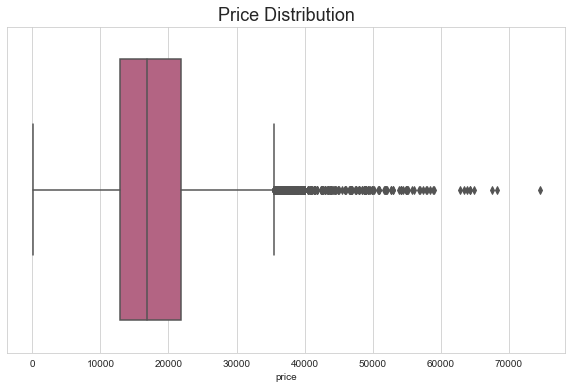

In [155]:
sns.boxplot(df["price"], color="#C05780")
plt.title("Price Distribution", size=18);

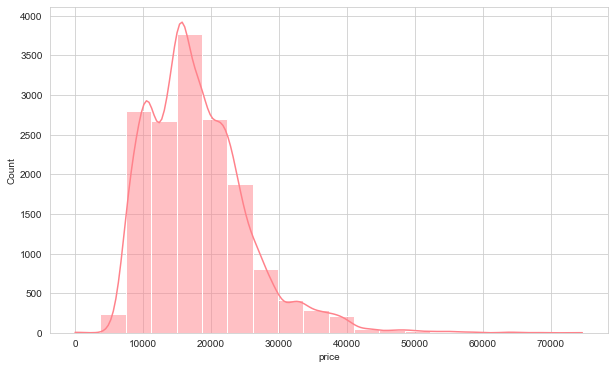

In [156]:
sns.histplot(df["price"], bins=20, kde=True, color="#FF828B");

## Check the final list of columns:

In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15919 entries, 0 to 15918
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   make_model           15919 non-null  object 
 1   body_type            15859 non-null  object 
 2   price                15919 non-null  int64  
 3   vat                  11406 non-null  object 
 4   km                   14895 non-null  float64
 5   Type                 15917 non-null  object 
 6   Previous Owners      9279 non-null   float64
 7   Body Color           15322 non-null  object 
 8   Paint Type           10147 non-null  object 
 9   Nr. of Doors         15707 non-null  object 
 10  Nr. of Seats         14942 non-null  object 
 11  Gearing Type         15919 non-null  object 
 12  Drive chain          9061 non-null   object 
 13  Emission Class       12291 non-null  object 
 14  Gears                11207 non-null  object 
 15  vehicle_age          14322 non-null 

In [158]:
# Rename some other column names

df.rename(columns = {"Type" : "type",
                     "Previous Owners" : "previous_owners",
                     "Body Color" : "body_color",
                     "Paint Type" : "paint_type",
                     "Nr. of Doors" : "number_of_doors",
                     "Nr. of Seats" : "number_of_seats", 
                     "Gearing Type" : "gearing_type",
                     "Drive chain" : "drive_chain",
                     "Emission Class" : "emission_class",
                     "Gears" : "gears"},
            inplace = True) 

df.head(2).T

,0,1
make_model,Audi A1,Audi A1
body_type,Sedans,Sedans
price,15770,14500
vat,VAT deductible,Price negotiable
km,56013.000,80000.000
type,Used,Used
previous_owners,2.000,NaN
body_color,Black,Red
paint_type,Metallic,NaN
number_of_doors,5,3


In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15919 entries, 0 to 15918
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   make_model           15919 non-null  object 
 1   body_type            15859 non-null  object 
 2   price                15919 non-null  int64  
 3   vat                  11406 non-null  object 
 4   km                   14895 non-null  float64
 5   type                 15917 non-null  object 
 6   previous_owners      9279 non-null   float64
 7   body_color           15322 non-null  object 
 8   paint_type           10147 non-null  object 
 9   number_of_doors      15707 non-null  object 
 10  number_of_seats      14942 non-null  object 
 11  gearing_type         15919 non-null  object 
 12  drive_chain          9061 non-null   object 
 13  emission_class       12291 non-null  object 
 14  gears                11207 non-null  object 
 15  vehicle_age          14322 non-null 

# Save the clean file as csv

In [160]:
df.to_csv("scout_car_cleaned.csv", index=False)

In [161]:
df_clean = pd.read_csv("scout_car_cleaned.csv")
df_clean.head(2).T

,0,1
make_model,Audi A1,Audi A1
body_type,Sedans,Sedans
price,15770,14500
vat,VAT deductible,Price negotiable
km,56013.000,80000.000
type,Used,Used
previous_owners,2.000,NaN
body_color,Black,Red
paint_type,Metallic,NaN
number_of_doors,5.000,3.000
